In [1]:
from dask.distributed import Client,Scheduler
from dask_jobqueue import SLURMCluster
cluster = SLURMCluster(cores=16,processes=1,memory="47GB")
client = Client(cluster)
cluster.scale(cores=48)

/g/data/fu5/deg581/miniconda3/envs/devel3.9/lib/python3.9/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile
/g/data/fu5/deg581/miniconda3/envs/devel3.9/lib/python3.9/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33447 instead
  warnings.warn(


In [2]:
cd /g/data/fu5/deg581/OSSE_analysis/notebooks/

/g/data1a/fu5/deg581/OSSE_analysis/notebooks


In [3]:
### run my startup script
exec(open("../src/functions/fun_loadStartup.py").read())
### load my functions
exec(open("../src/functions/fun_loadMyFunctions.py").read())

%config InlineBackend.figure_format='png'

### Load grid
grdFile = '../data/raw/EACouter_varres_grd_mergedBLbry_uhroms.nc'
grid = loadRomsGrid(grdFile)


loaded my modules
loaded my own functions
loading ROMS grid from ../data/raw/EACouter_varres_grd_mergedBLbry_uhroms.nc


In [4]:
# ### Set file names
# runningLocation = 'local'
# if  runningLocation== 'local':
#     hisOSSEFilePath='../data/raw/OSSE_SSHSST/'
#     hisTruthFilePath='../data/raw/truth/final/'
#     obsFinalFilePath='../data/raw/OSSE_SSHSST/' #the 'final' obs files: Verification obs, + NLmodel values from modTruth.
#     modOSSEFilePath='../data/raw/OSSE_SSHSST/'
#     # hisPertFilePath='../data/raw/perturbed/'
# elif runningLocation == 'gdata':
#     hisOSSEFilePath='/g/data/fu5/eac/OSSEs/OSSE_ssh_sst_is4dvar/output/'
#     hisTruthFilePath='/g/data/fu5/deg581/EAC_2yr_truthRun_obsVerification/output/' # Truth file settings
#     obsFinalFilePath='/g/data/fu5/eac/OSSEs/OSSE_ssh_sst_is4dvar/output/'
#     modOSSEFilePath='/g/data/fu5/eac/OSSEs/OSSE_ssh_sst_is4dvar/output/'
# #     hisPertFilePath='/g/data/fu5/deg581/EAC_2yr_perturbedRun_final/output/'

# prefixForecast='roms_fwd_outer0_'
# prefixAnalysis='roms_fwd_outer1_'
# prefixTruth='outer_his_'
# prefixObs='obs_0'
# prefixMod='eac_mod_'
# prefixPert='outer_his_'

# outFigurePath='../cache/out/'

In [5]:
hisTruthFilePath='/g/data/fu5/deg581/EAC_2yr_truthRun_obsVerification/output/' # Truth file settings

hisOSSEFilePath1='/g/data/fu5/eac/OSSEs/OSSE_ssh_sst_is4dvar/output/'
modOSSEFilePath1='/g/data/fu5/eac/OSSEs/OSSE_ssh_sst_is4dvar/output/'
obsOSSEFilePath1='/g/data/fu5/eac/OSSEs/OSSE_ssh_sst_is4dvar/output/'

hisOSSEFilePath2='/g/data/fu5/deg581/OSSE_SSHSST_XBT/output/'
modOSSEFilePath2='/g/data/fu5/deg581/OSSE_SSHSST_XBT/output/'
obsOSSEFilePath2='/g/data/fu5/deg581/OSSE_SSHSST_XBT/output/'

hisOSSEFilePath3='/g/data/fu5/deg581/OSSE_SSHSST_XBT_NORTH/output/'
modOSSEFilePath3='/g/data/fu5/deg581/OSSE_SSHSST_XBT_NORTH/output/'
obsOSSEFilePath3='/g/data/fu5/deg581/OSSE_SSHSST_XBT_NORTH/output/'

hisOSSEFilePath4='/g/data/fu5/deg581/OSSE_SSHSST_XBT_SOUTH/output/'
modOSSEFilePath4='/g/data/fu5/deg581/OSSE_SSHSST_XBT_SOUTH/output/'
obsOSSEFilePath4='/g/data/fu5/deg581/OSSE_SSHSST_XBT_SOUTH/output/'

hisOSSEFilePath5='/g/data/fu5/deg581/OSSE_SSHSST_XBT_SOUTH/output/'
modOSSEFilePath5='/g/data/fu5/deg581/OSSE_SSHSST_XBT_SOUTH/output/'
obsOSSEFilePath5='/g/data/fu5/deg581/OSSE_SSHSST_XBT_SOUTH/output/'

prefixForecast='roms_fwd_outer0_'
prefixAnalysis='roms_fwd_outer1_'
prefixTruth='outer_his_'
prefixObs='obs_0'
prefixMod='eac_mod_'
prefixPert='outer_his_'

outFigurePath='../cache/out/'

### Load functions

In [6]:
### function to load overlapping OSSE data
def loadOSSE(hisFilePath,prefix,filestring='0*.nc',overlapDays=7):
    chunks = {'ocean_time':1}
    filelist = glob.glob(hisFilePath+prefix+filestring)

    def preprocessRemoveLastDay(ds):
        '''remove the last 7 timesteps from each file'''
        return ds.isel(ocean_time = slice(0,-overlapDays))

#     for files in filelist: 
#         print(files)
    outName = xr.open_mfdataset(filelist,chunks, preprocess=preprocessRemoveLastDay, data_vars='minimal', compat='override', coords='minimal', parallel=True, join='right') 
    print('loaded from '+filelist[0]+' to '+filelist[-1])
    return outName

### function to load overlapping OSSE data
def loadOverlappedNetcdf(hisFilePath,prefix,filestring='0*.nc',overlapDays=7):
    chunks = {'ocean_time':1}
    filelist = sorted(glob.glob(hisFilePath+prefix+filestring))

    def preprocessRemoveLastDay(ds):
        '''remove the last 7 timesteps from each file'''
        return ds.isel(ocean_time = slice(0,-overlapDays))

    outName = xr.open_mfdataset(filelist,chunks, preprocess=preprocessRemoveLastDay, data_vars='minimal', compat='override', coords='minimal', parallel=True, join='right') 
    print('loaded from '+filelist[0]+' to '+filelist[-1])
    return outName

def dropDuplicateTimes(inputData):
    _, index = np.unique(inputData['ocean_time'], return_index=True)
    out = inputData.isel(ocean_time=index)
    return out

def calc_rmseSpatial(input1,input2,etaRange,xiRange):
    err2 = (input1-input2)**2
    # err=err2**(1/2)
    mse = indexMeanMetric(err2,etaRange,xiRange) #mean square error MSE
    output = mse**(1/2)
    return mse,output

# define function for calculating spatial mean
def indexMeanMetric(input,etaRange,xiRange):
    ''' iRange and jRange are converted to slices, so they are the start/end values of the range '''
    output = input.isel(eta_rho=slice(etaRange[0],etaRange[1]), xi_rho=slice(xiRange[0],xiRange[1])).mean(dim='eta_rho', skipna=True).mean(dim='xi_rho', skipna=True)
    return output

def simple_TimeSeries(inputDataX, inputDataY, plt_kwargs={}, ax=None):
    #Plotting
    if ax is None:
        ax = plt.gca()   
    hOut = ax.plot(inputDataX, inputDataY, **plt_kwargs)
    ax.grid(color='black', alpha=0.2, linestyle='--')
    return(hOut)

def plot_spatialMapSubplot(toPlotData, ax=None, pcol_kwargs={}, cont_kwargs={}, kde_kwargs={}):
    #Plotting
    if ax is None:
        ax = plt.gca()
    # plt.subplot(projection=ccrs.PlateCarree())
#     ax = fig.add_subplot(gs[ax], projection=ccrs.PlateCarree())
    ax.set_extent([147, 162.5, -42, -25])
    feature = ax.add_feature(Coast, edgecolor='black',facecolor='gray')
    im=toPlotData.plot.pcolormesh('lon_rho','lat_rho',ax=ax, add_colorbar=False, **pcol_kwargs)       
    toPlotData.plot.contour('lon_rho','lat_rho',ax=ax, **cont_kwargs)
    gl = ax.gridlines(draw_labels=True,
                     color='black', alpha=0.2, linestyle='--')
        #gl.xformatter = LONGITUDE_FORMATTER
        #gl.yformatter = LATITUDE_FORMATTER
    gl.right_labels = False
    gl.top_labels = False
    cax = inset_axes(ax,
                 width="5%",  # width = 10% of parent_bbox width
                 height="50%",  # height : 50%
                 loc='lower left',
                 bbox_to_anchor=(.07,.39, 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=0,
                 )
    fig.colorbar(im, cax=cax)

def plot_spatialMapGSSubplot(toPlotData, ax=None, pcol_kwargs={}, cont_kwargs={}, kde_kwargs={}):
    #Plotting
    if ax is None:
        ax = plt.gca()
    # plt.subplot(projection=ccrs.PlateCarree())
#     ax = fig.add_subplot(gs[ax], projection=ccrs.PlateCarree())
    ax.set_extent([147, 162.5, -42, -25])
    feature = ax.add_feature(Coast, edgecolor='black',facecolor='gray')
    im=toPlotData.plot.pcolormesh('lon_rho','lat_rho',ax=ax, add_colorbar=False, **pcol_kwargs)       
    toPlotData.plot.contour('lon_rho','lat_rho',ax=ax, **cont_kwargs)
    gl = ax.gridlines(draw_labels=True,
                     color='black', alpha=0.2, linestyle='--')
        #gl.xformatter = LONGITUDE_FORMATTER
        #gl.yformatter = LATITUDE_FORMATTER
    gl.right_labels = False
    gl.top_labels = False
    cax = inset_axes(ax,
                 width="5%",  # width = 10% of parent_bbox width
                 height="50%",  # height : 50%
                 loc='lower left',
                 bbox_to_anchor=(.07,.39, 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=0,
                 )
    fig.colorbar(im, cax=cax)

def calc_boxSpatial(grid,etaRange,xiRange):
    pt00lo = grid['lon_rho'].isel(eta_rho=etaRange[0],xi_rho=xiRange[0]).values
    pt01lo = grid['lon_rho'].isel(eta_rho=etaRange[0],xi_rho=xiRange[1]).values
    pt10lo = grid['lon_rho'].isel(eta_rho=etaRange[1],xi_rho=xiRange[0]).values
    pt11lo = grid['lon_rho'].isel(eta_rho=etaRange[1],xi_rho=xiRange[1]).values
    pt00la = grid['lat_rho'].isel(eta_rho=etaRange[0],xi_rho=xiRange[0]).values
    pt01la = grid['lat_rho'].isel(eta_rho=etaRange[0],xi_rho=xiRange[1]).values
    pt10la = grid['lat_rho'].isel(eta_rho=etaRange[1],xi_rho=xiRange[0]).values
    pt11la = grid['lat_rho'].isel(eta_rho=etaRange[1],xi_rho=xiRange[1]).values
    boxLo = np.array([pt00lo, pt01lo, pt11lo, pt10lo, pt00lo])
    boxLa = np.array([pt00la, pt01la, pt11la, pt10la, pt00la])
    return boxLo,boxLa

def datestring_to_serial_day(datestring,epochY=1990,epochm=1,epochd=1,epochH=0,epochM=0):
    import pandas as pd
    import datetime
    serial_day_timedelta = pd.to_datetime(datestring) - datetime.datetime(epochY,epochm,epochd,epochH,epochM)
    corrected_serial_day_number = serial_day_timedelta.days + serial_day_timedelta.seconds/86400
    return corrected_serial_day_number


def serial_day_to_datestring(day,epochY=1990,epochm=1,epochd=1,epochH=0,epochM=0):
    import datetime
    corrected_date = datetime.datetime(epochY,epochm,epochd,epochH,epochM) + datetime.timedelta(day)
    return corrected_date.strftime("%Y-%m-%d %H:%M")  

# Now plot results

In [7]:
timeRange = [8005, 8401]

datelist = np.array(range(timeRange[0],timeRange[1],4))

timeCoordinate=[]
for tt in datelist:
    timeCoordinate.append(serial_day_to_datestring(int(tt)))
timeCoordinate = np.asarray(timeCoordinate, dtype='datetime64[s]')

iteration = np.arange(1,16)
Mouter = np.arange(1,3)
cost_var = np.arange(1,13)

In [8]:
pRangeSSH=405
pRangeSST=340
pRangeXBT=939

/local/m68/deg581/tmp/ipykernel_1660753/2811696095.py:73: RuntimeWarning: invalid value encountered in true_divide
  ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values/np.shape(mod.obs_scale.where(mod.obs_provenance==939,drop=True))*100),color='C2',linewidth=0,marker='.')
/local/m68/deg581/tmp/ipykernel_1660753/2811696095.py:73: RuntimeWarning: invalid value encountered in true_divide
  ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values/np.shape(mod.obs_scale.where(mod.obs_provenance==939,drop=True))*100),color='C2',linewidth=0,marker='.')
/local/m68/deg581/tmp/ipykernel_1660753/2811696095.py:73: RuntimeWarning: invalid value encountered in true_divide
  ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values/np.shape(mod.obs_scale.where(mod.obs_provenance==939,drop=True))*100),color='C2',linewidth=0,marker='.')
/local/m68/deg581/tmp/ipykernel_1660753/281

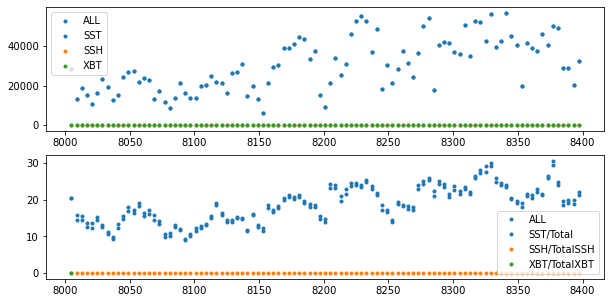

In [230]:
ossefilepath = obsOSSEFilePath1
modfilepath = modOSSEFilePath1


timeVec = np.zeros(len(datelist))
JobsInitialXBT = np.zeros(len(datelist))
JobsInitialALL = np.zeros(len(datelist))
JobsInitialSST = np.zeros(len(datelist))
JobsInitialSSH = np.zeros(len(datelist))
JobsFinalXBT = np.zeros(len(datelist))
JobsFinalSST = np.zeros(len(datelist))
JobsFinalSSH = np.zeros(len(datelist))
JobsFinalALL = np.zeros(len(datelist))
TLcost_function = np.zeros([15,len(datelist)])
NLcost_function = np.zeros([2,12,len(datelist)])

fig,ax=plt.subplots(nrows=2,figsize=(10,5))

rr=0
for dates in datelist:

    filenameObs = ossefilepath+prefixObs+str(dates)+'.nc'
    filenameMod = modfilepath+prefixMod+'0'+str(dates)+'.nc'

    obs = xr.open_dataset(filenameObs).load()
    mod = xr.open_dataset(filenameMod).load()

    obsALL = obs.obs_value.where(~np.isnan(mod.obs_scale), drop=True)
    obsXBT = obs.obs_value.where((obs.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    obsSST = obs.obs_value.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    obsSSH = obs.obs_value.where((obs.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)
    obsErrALL = obs.obs_error.where(~np.isnan(mod.obs_scale), drop=True)
    obsErrXBT = obs.obs_error.where((obs.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    obsErrSST = obs.obs_error.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    obsErrSSH = obs.obs_error.where((obs.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)
    modInitialALL = mod.NLmodel_initial.where(~np.isnan(mod.obs_scale), drop=True)
    modInitialXBT = mod.NLmodel_initial.where((mod.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    modInitialSST = mod.NLmodel_initial.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    modInitialSSH = mod.NLmodel_initial.where((mod.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)
    modFinalALL = mod.NLmodel_value.where(~np.isnan(mod.obs_scale), drop=True)
    modFinalXBT = mod.NLmodel_value.where((mod.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    modFinalSST = mod.NLmodel_value.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    modFinalSSH = mod.NLmodel_value.where((mod.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)

    JobsInitialALL[rr] = np.nansum((obsALL - modInitialALL)**2 / obsErrALL)
    JobsInitialXBT[rr] = np.nansum((obsXBT - modInitialXBT)**2 / obsErrXBT)
    JobsInitialSST[rr] = np.nansum((obsSST - modInitialSST)**2 / obsErrSST)
    JobsInitialSSH[rr] = np.nansum((obsSSH - modInitialSSH)**2 / obsErrSSH)
    JobsFinalALL[rr] = np.nansum((obsALL - modFinalALL)**2 / obsErrALL)
    JobsFinalXBT[rr] = np.nansum((obsXBT - modFinalXBT)**2 / obsErrXBT)
    JobsFinalSST[rr] = np.nansum((obsSST - modFinalSST)**2 / obsErrSST)
    JobsFinalSSH[rr] = np.nansum((obsSSH - modFinalSSH)**2 / obsErrSSH)
    TLcost_function[:,rr] = mod.TLcost_function
    NLcost_function[:,:,rr] = mod.NLcost_function
    
    if rr==0:
        ax[0].plot(np.nanmean(dates),np.sum(np.isnan(mod.obs_scale)).values,color='C0',linewidth=0,marker='.',label='ALL')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values,color='C0',linewidth=0,marker='.',label='SST')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values,color='C1',linewidth=0,marker='.',label='SSH')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values,color='C2',linewidth=0,marker='.',label='XBT')
        ax[1].plot(np.nanmean(dates),(np.sum(np.isnan(mod.obs_scale)).values/np.shape(mod.obs_scale)*100),color='C0',linewidth=0,marker='.',label='ALL')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values/np.shape(mod.obs_scale)*100),color='C0',linewidth=0,marker='.',label='SST/Total')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values/np.shape(mod.obs_scale)*100),color='C1',linewidth=0,marker='.',label='SSH/TotalSSH')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values/np.shape(mod.obs_scale)*100),color='C2',linewidth=0,marker='.',label='XBT/TotalXBT')
    else:
        ax[0].plot(np.nanmean(dates),np.sum(np.isnan(mod.obs_scale)).values,color='C0',linewidth=0,marker='.')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values,color='C0',linewidth=0,marker='.')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values,color='C1',linewidth=0,marker='.')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values,color='C2',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum(np.isnan(mod.obs_scale)).values/np.shape(mod.obs_scale)*100),color='C0',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values/(np.shape(mod.obs_scale.where(mod.obs_provenance==340,drop=True)))*100),color='C0',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values/np.shape(mod.obs_scale.where(mod.obs_provenance==405,drop=True))*100),color='C1',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values/np.shape(mod.obs_scale.where(mod.obs_provenance==939,drop=True))*100),color='C2',linewidth=0,marker='.')
         
    

    
    timeVec[rr]=np.nanmean(dates)
    rr=rr+1
ax[0].legend()
ax[1].legend()


JobsInitialALL = xr.DataArray(JobsInitialALL,coords=[timeCoordinate],dims='time',name='JobsInitialALL')
JobsInitialXBT = xr.DataArray(JobsInitialXBT,coords=[timeCoordinate],dims='time',name='JobsInitialXBT')
JobsInitialSST = xr.DataArray(JobsInitialSST,coords=[timeCoordinate],dims='time',name='JobsInitialSST')
JobsInitialSSH = xr.DataArray(JobsInitialSSH,coords=[timeCoordinate],dims='time',name='JobsInitialSSH')
JobsFinalALL = xr.DataArray(JobsFinalALL,coords=[timeCoordinate],dims='time',name='JobsFinalALL')
JobsFinalXBT = xr.DataArray(JobsFinalXBT,coords=[timeCoordinate],dims='time',name='JobsFinalXBT')
JobsFinalSST = xr.DataArray(JobsFinalSST,coords=[timeCoordinate],dims='time',name='JobsFinalSST')
JobsFinalSSH = xr.DataArray(JobsFinalSSH,coords=[timeCoordinate],dims='time',name='JobsFinalSSH')
cycle = xr.DataArray(timeVec,coords=[timeCoordinate],dims='time',name='cycle')
TLcost_function = xr.DataArray(TLcost_function,coords=[iteration,timeCoordinate],dims=['inner_loop','time'],name='TLcost_function')
NLcost_function = xr.DataArray(NLcost_function,coords=[Mouter, cost_var, timeCoordinate],dims=['Mouter','cost_var','time'],name='NLcost_function')

outputs = [JobsInitialALL,JobsInitialXBT,JobsInitialSST,JobsInitialSSH,JobsFinalALL,JobsFinalXBT,JobsFinalSST,JobsFinalSSH,cycle,TLcost_function,NLcost_function]

ds1 = xr.merge(outputs)

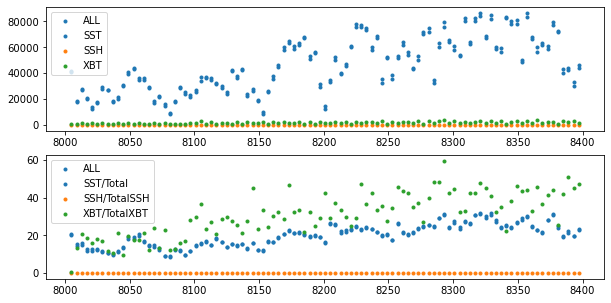

In [233]:
ossefilepath = obsOSSEFilePath2
modfilepath = modOSSEFilePath2


timeVec = np.zeros(len(datelist))
JobsInitialXBT = np.zeros(len(datelist))
JobsInitialALL = np.zeros(len(datelist))
JobsInitialSST = np.zeros(len(datelist))
JobsInitialSSH = np.zeros(len(datelist))
JobsFinalXBT = np.zeros(len(datelist))
JobsFinalSST = np.zeros(len(datelist))
JobsFinalSSH = np.zeros(len(datelist))
JobsFinalALL = np.zeros(len(datelist))
TLcost_function = np.zeros([15,len(datelist)])
NLcost_function = np.zeros([2,12,len(datelist)])

fig,ax=plt.subplots(nrows=2,figsize=(10,5))

rr=0
for dates in datelist:

    filenameObs = ossefilepath+prefixObs+str(dates)+'.nc'
    filenameMod = modfilepath+prefixMod+'0'+str(dates)+'.nc'

    obs = xr.open_dataset(filenameObs).load()
    mod = xr.open_dataset(filenameMod).load()

    obsALL = obs.obs_value.where(~np.isnan(mod.obs_scale), drop=True)
    obsXBT = obs.obs_value.where((obs.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    obsSST = obs.obs_value.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    obsSSH = obs.obs_value.where((obs.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)
    obsErrALL = obs.obs_error.where(~np.isnan(mod.obs_scale), drop=True)
    obsErrXBT = obs.obs_error.where((obs.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    obsErrSST = obs.obs_error.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    obsErrSSH = obs.obs_error.where((obs.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)
    modInitialALL = mod.NLmodel_initial.where(~np.isnan(mod.obs_scale), drop=True)
    modInitialXBT = mod.NLmodel_initial.where((mod.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    modInitialSST = mod.NLmodel_initial.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    modInitialSSH = mod.NLmodel_initial.where((mod.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)
    modFinalALL = mod.NLmodel_value.where(~np.isnan(mod.obs_scale), drop=True)
    modFinalXBT = mod.NLmodel_value.where((mod.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    modFinalSST = mod.NLmodel_value.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    modFinalSSH = mod.NLmodel_value.where((mod.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)

    JobsInitialALL[rr] = np.nansum((obsALL - modInitialALL)**2 / obsErrALL)
    JobsInitialXBT[rr] = np.nansum((obsXBT - modInitialXBT)**2 / obsErrXBT)
    JobsInitialSST[rr] = np.nansum((obsSST - modInitialSST)**2 / obsErrSST)
    JobsInitialSSH[rr] = np.nansum((obsSSH - modInitialSSH)**2 / obsErrSSH)
    JobsFinalALL[rr] = np.nansum((obsALL - modFinalALL)**2 / obsErrALL)
    JobsFinalXBT[rr] = np.nansum((obsXBT - modFinalXBT)**2 / obsErrXBT)
    JobsFinalSST[rr] = np.nansum((obsSST - modFinalSST)**2 / obsErrSST)
    JobsFinalSSH[rr] = np.nansum((obsSSH - modFinalSSH)**2 / obsErrSSH)
    TLcost_function[:,rr] = mod.TLcost_function
    NLcost_function[:,:,rr] = mod.NLcost_function
    
    if rr==0:
        ax[0].plot(np.nanmean(dates),np.sum(np.isnan(mod.obs_scale)).values,color='C0',linewidth=0,marker='.',label='ALL')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values,color='C0',linewidth=0,marker='.',label='SST')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values,color='C1',linewidth=0,marker='.',label='SSH')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values,color='C2',linewidth=0,marker='.',label='XBT')
        ax[1].plot(np.nanmean(dates),(np.sum(np.isnan(mod.obs_scale)).values/np.shape(mod.obs_scale)*100),color='C0',linewidth=0,marker='.',label='ALL')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values/np.shape(mod.obs_scale)*100),color='C0',linewidth=0,marker='.',label='SST/Total')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values/np.shape(mod.obs_scale)*100),color='C1',linewidth=0,marker='.',label='SSH/TotalSSH')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values/np.shape(mod.obs_scale)*100),color='C2',linewidth=0,marker='.',label='XBT/TotalXBT')
    else:
        ax[0].plot(np.nanmean(dates),np.sum(np.isnan(mod.obs_scale)).values,color='C0',linewidth=0,marker='.')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values,color='C0',linewidth=0,marker='.')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values,color='C1',linewidth=0,marker='.')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values,color='C2',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum(np.isnan(mod.obs_scale)).values/np.shape(mod.obs_scale)*100),color='C0',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values/(np.shape(mod.obs_scale.where(mod.obs_provenance==340,drop=True)))*100),color='C0',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values/np.shape(mod.obs_scale.where(mod.obs_provenance==405,drop=True))*100),color='C1',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values/np.shape(mod.obs_scale.where(mod.obs_provenance==939,drop=True))*100),color='C2',linewidth=0,marker='.')
         
    

    
    timeVec[rr]=np.nanmean(dates)
    rr=rr+1
ax[0].legend()
ax[1].legend()




JobsInitialALL = xr.DataArray(JobsInitialALL,coords=[timeCoordinate],dims='time',name='JobsInitialALL')
JobsInitialXBT = xr.DataArray(JobsInitialXBT,coords=[timeCoordinate],dims='time',name='JobsInitialXBT')
JobsInitialSST = xr.DataArray(JobsInitialSST,coords=[timeCoordinate],dims='time',name='JobsInitialSST')
JobsInitialSSH = xr.DataArray(JobsInitialSSH,coords=[timeCoordinate],dims='time',name='JobsInitialSSH')
JobsFinalALL = xr.DataArray(JobsFinalALL,coords=[timeCoordinate],dims='time',name='JobsFinalALL')
JobsFinalXBT = xr.DataArray(JobsFinalXBT,coords=[timeCoordinate],dims='time',name='JobsFinalXBT')
JobsFinalSST = xr.DataArray(JobsFinalSST,coords=[timeCoordinate],dims='time',name='JobsFinalSST')
JobsFinalSSH = xr.DataArray(JobsFinalSSH,coords=[timeCoordinate],dims='time',name='JobsFinalSSH')
cycle = xr.DataArray(timeVec,coords=[timeCoordinate],dims='time',name='cycle')
TLcost_function = xr.DataArray(TLcost_function,coords=[iteration,timeCoordinate],dims=['inner_loop','time'],name='TLcost_function')
NLcost_function = xr.DataArray(NLcost_function,coords=[Mouter, cost_var, timeCoordinate],dims=['Mouter','cost_var','time'],name='NLcost_function')

outputs = [JobsInitialALL,JobsInitialXBT,JobsInitialSST,JobsInitialSSH,JobsFinalALL,JobsFinalXBT,JobsFinalSST,JobsFinalSSH,cycle,TLcost_function,NLcost_function]

ds2 = xr.merge(outputs)

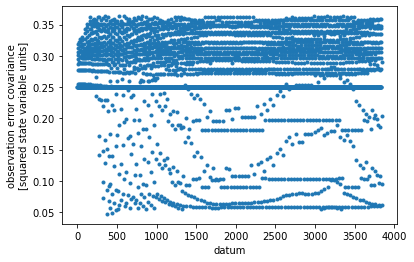

In [237]:
mod.obs_error.where(mod.obs_provenance==939,drop=True).plot(linewidth=0,marker='.')

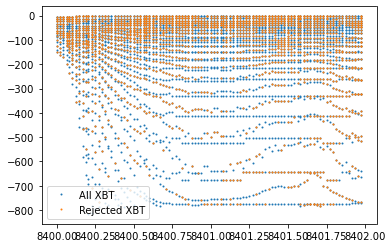

In [252]:
plt.plot(mod.obs_time.where((mod.obs_provenance==939),drop=True),mod.obs_depth.where((mod.obs_provenance==939),drop=True),linewidth=0,marker='.',markersize=2,label='All XBT')
plt.plot(mod.obs_time.where((mod.obs_provenance==939)&(~np.isnan(mod.obs_scale)),drop=True),mod.obs_depth.where((mod.obs_provenance==939)&(~np.isnan(mod.obs_scale)),drop=True),linewidth=0,marker='.',markersize=2,label='Rejected XBT')
plt.legend()

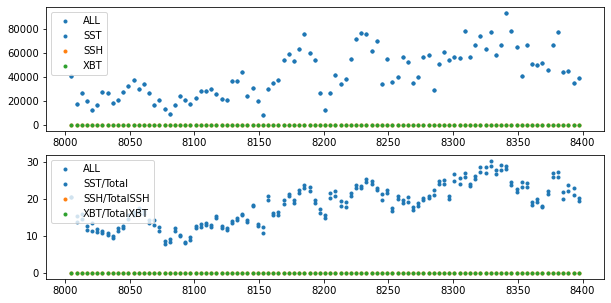

In [228]:
ossefilepath = obsOSSEFilePath3
modfilepath = modOSSEFilePath3


timeVec = np.zeros(len(datelist))
JobsInitialXBT = np.zeros(len(datelist))
JobsInitialALL = np.zeros(len(datelist))
JobsInitialSST = np.zeros(len(datelist))
JobsInitialSSH = np.zeros(len(datelist))
JobsFinalXBT = np.zeros(len(datelist))
JobsFinalSST = np.zeros(len(datelist))
JobsFinalSSH = np.zeros(len(datelist))
JobsFinalALL = np.zeros(len(datelist))
TLcost_function = np.zeros([15,len(datelist)])
NLcost_function = np.zeros([2,12,len(datelist)])
fig,ax=plt.subplots(nrows=2,figsize=(10,5))

rr=0
for dates in datelist:

    filenameObs = ossefilepath+prefixObs+str(dates)+'.nc'
    filenameMod = modfilepath+prefixMod+'0'+str(dates)+'.nc'

    obs = xr.open_dataset(filenameObs).load()
    mod = xr.open_dataset(filenameMod).load()

    obsALL = obs.obs_value.where(~np.isnan(mod.obs_scale), drop=True)
    obsXBT = obs.obs_value.where((obs.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    obsSST = obs.obs_value.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    obsSSH = obs.obs_value.where((obs.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)
    obsErrALL = obs.obs_error.where(~np.isnan(mod.obs_scale), drop=True)
    obsErrXBT = obs.obs_error.where((obs.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    obsErrSST = obs.obs_error.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    obsErrSSH = obs.obs_error.where((obs.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)
    modInitialALL = mod.NLmodel_initial.where(~np.isnan(mod.obs_scale), drop=True)
    modInitialXBT = mod.NLmodel_initial.where((mod.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    modInitialSST = mod.NLmodel_initial.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    modInitialSSH = mod.NLmodel_initial.where((mod.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)
    modFinalALL = mod.NLmodel_value.where(~np.isnan(mod.obs_scale), drop=True)
    modFinalXBT = mod.NLmodel_value.where((mod.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    modFinalSST = mod.NLmodel_value.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    modFinalSSH = mod.NLmodel_value.where((mod.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)

    JobsInitialALL[rr] = np.nansum((obsALL - modInitialALL)**2 / obsErrALL)
    JobsInitialXBT[rr] = np.nansum((obsXBT - modInitialXBT)**2 / obsErrXBT)
    JobsInitialSST[rr] = np.nansum((obsSST - modInitialSST)**2 / obsErrSST)
    JobsInitialSSH[rr] = np.nansum((obsSSH - modInitialSSH)**2 / obsErrSSH)
    JobsFinalALL[rr] = np.nansum((obsALL - modFinalALL)**2 / obsErrALL)
    JobsFinalXBT[rr] = np.nansum((obsXBT - modFinalXBT)**2 / obsErrXBT)
    JobsFinalSST[rr] = np.nansum((obsSST - modFinalSST)**2 / obsErrSST)
    JobsFinalSSH[rr] = np.nansum((obsSSH - modFinalSSH)**2 / obsErrSSH)
    TLcost_function[:,rr] = mod.TLcost_function
    NLcost_function[:,:,rr] = mod.NLcost_function
    
    if rr==0:
        ax[0].plot(np.nanmean(dates),np.sum(np.isnan(mod.obs_scale)).values,color='C0',linewidth=0,marker='.',label='ALL')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values,color='C0',linewidth=0,marker='.',label='SST')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values,color='C1',linewidth=0,marker='.',label='SSH')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values,color='C2',linewidth=0,marker='.',label='XBT')
        ax[1].plot(np.nanmean(dates),(np.sum(np.isnan(mod.obs_scale)).values/np.shape(mod.obs_scale)*100),color='C0',linewidth=0,marker='.',label='ALL')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values/np.shape(mod.obs_scale)*100),color='C0',linewidth=0,marker='.',label='SST/Total')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values/np.shape(mod.obs_scale)*100),color='C1',linewidth=0,marker='.',label='SSH/TotalSSH')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values/np.shape(mod.obs_scale)*100),color='C2',linewidth=0,marker='.',label='XBT/TotalXBT')
    else:
        ax[0].plot(np.nanmean(dates),np.sum(np.isnan(mod.obs_scale)).values,color='C0',linewidth=0,marker='.')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values,color='C0',linewidth=0,marker='.')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values,color='C1',linewidth=0,marker='.')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values,color='C2',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum(np.isnan(mod.obs_scale)).values/np.shape(mod.obs_scale)*100),color='C0',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values/(np.shape(mod.obs_scale.where(mod.obs_provenance==340,drop=True)))*100),color='C0',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values/np.shape(mod.obs_scale.where(mod.obs_provenance==405,drop=True))*100),color='C1',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values/np.shape(mod.obs_scale.where(mod.obs_provenance==939,drop=True))*100),color='C2',linewidth=0,marker='.')
         
    

    
    timeVec[rr]=np.nanmean(dates)
    rr=rr+1
ax[0].legend()
ax[1].legend()


JobsInitialALL = xr.DataArray(JobsInitialALL,coords=[timeCoordinate],dims='time',name='JobsInitialALL')
JobsInitialXBT = xr.DataArray(JobsInitialXBT,coords=[timeCoordinate],dims='time',name='JobsInitialXBT')
JobsInitialSST = xr.DataArray(JobsInitialSST,coords=[timeCoordinate],dims='time',name='JobsInitialSST')
JobsInitialSSH = xr.DataArray(JobsInitialSSH,coords=[timeCoordinate],dims='time',name='JobsInitialSSH')
JobsFinalALL = xr.DataArray(JobsFinalALL,coords=[timeCoordinate],dims='time',name='JobsFinalALL')
JobsFinalXBT = xr.DataArray(JobsFinalXBT,coords=[timeCoordinate],dims='time',name='JobsFinalXBT')
JobsFinalSST = xr.DataArray(JobsFinalSST,coords=[timeCoordinate],dims='time',name='JobsFinalSST')
JobsFinalSSH = xr.DataArray(JobsFinalSSH,coords=[timeCoordinate],dims='time',name='JobsFinalSSH')
cycle = xr.DataArray(timeVec,coords=[timeCoordinate],dims='time',name='cycle')
TLcost_function = xr.DataArray(TLcost_function,coords=[iteration,timeCoordinate],dims=['inner_loop','time'],name='TLcost_function')
NLcost_function = xr.DataArray(NLcost_function,coords=[Mouter, cost_var, timeCoordinate],dims=['Mouter','cost_var','time'],name='NLcost_function')

outputs = [JobsInitialALL,JobsInitialXBT,JobsInitialSST,JobsInitialSSH,JobsFinalALL,JobsFinalXBT,JobsFinalSST,JobsFinalSSH,cycle,TLcost_function,NLcost_function]

ds3 = xr.merge(outputs)

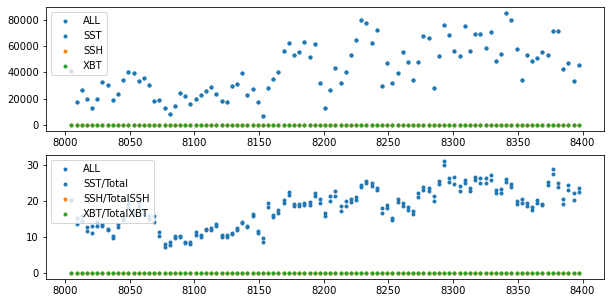

In [229]:
ossefilepath = obsOSSEFilePath4
modfilepath = modOSSEFilePath4


timeVec = np.zeros(len(datelist))
JobsInitialXBT = np.zeros(len(datelist))
JobsInitialALL = np.zeros(len(datelist))
JobsInitialSST = np.zeros(len(datelist))
JobsInitialSSH = np.zeros(len(datelist))
JobsFinalXBT = np.zeros(len(datelist))
JobsFinalSST = np.zeros(len(datelist))
JobsFinalSSH = np.zeros(len(datelist))
JobsFinalALL = np.zeros(len(datelist))
TLcost_function = np.zeros([15,len(datelist)])
NLcost_function = np.zeros([2,12,len(datelist)])
fig,ax=plt.subplots(nrows=2,figsize=(10,5))

rr=0
for dates in datelist:

    filenameObs = ossefilepath+prefixObs+str(dates)+'.nc'
    filenameMod = modfilepath+prefixMod+'0'+str(dates)+'.nc'

    obs = xr.open_dataset(filenameObs).load()
    mod = xr.open_dataset(filenameMod).load()

    obsALL = obs.obs_value.where(~np.isnan(mod.obs_scale), drop=True)
    obsXBT = obs.obs_value.where((obs.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    obsSST = obs.obs_value.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    obsSSH = obs.obs_value.where((obs.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)
    obsErrALL = obs.obs_error.where(~np.isnan(mod.obs_scale), drop=True)
    obsErrXBT = obs.obs_error.where((obs.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    obsErrSST = obs.obs_error.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    obsErrSSH = obs.obs_error.where((obs.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)
    modInitialALL = mod.NLmodel_initial.where(~np.isnan(mod.obs_scale), drop=True)
    modInitialXBT = mod.NLmodel_initial.where((mod.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    modInitialSST = mod.NLmodel_initial.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    modInitialSSH = mod.NLmodel_initial.where((mod.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)
    modFinalALL = mod.NLmodel_value.where(~np.isnan(mod.obs_scale), drop=True)
    modFinalXBT = mod.NLmodel_value.where((mod.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    modFinalSST = mod.NLmodel_value.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    modFinalSSH = mod.NLmodel_value.where((mod.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)

    JobsInitialALL[rr] = np.nansum((obsALL - modInitialALL)**2 / obsErrALL)
    JobsInitialXBT[rr] = np.nansum((obsXBT - modInitialXBT)**2 / obsErrXBT)
    JobsInitialSST[rr] = np.nansum((obsSST - modInitialSST)**2 / obsErrSST)
    JobsInitialSSH[rr] = np.nansum((obsSSH - modInitialSSH)**2 / obsErrSSH)
    JobsFinalALL[rr] = np.nansum((obsALL - modFinalALL)**2 / obsErrALL)
    JobsFinalXBT[rr] = np.nansum((obsXBT - modFinalXBT)**2 / obsErrXBT)
    JobsFinalSST[rr] = np.nansum((obsSST - modFinalSST)**2 / obsErrSST)
    JobsFinalSSH[rr] = np.nansum((obsSSH - modFinalSSH)**2 / obsErrSSH)
    TLcost_function[:,rr] = mod.TLcost_function
    NLcost_function[:,:,rr] = mod.NLcost_function
    
    if rr==0:
        ax[0].plot(np.nanmean(dates),np.sum(np.isnan(mod.obs_scale)).values,color='C0',linewidth=0,marker='.',label='ALL')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values,color='C0',linewidth=0,marker='.',label='SST')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values,color='C1',linewidth=0,marker='.',label='SSH')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values,color='C2',linewidth=0,marker='.',label='XBT')
        ax[1].plot(np.nanmean(dates),(np.sum(np.isnan(mod.obs_scale)).values/np.shape(mod.obs_scale)*100),color='C0',linewidth=0,marker='.',label='ALL')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values/np.shape(mod.obs_scale)*100),color='C0',linewidth=0,marker='.',label='SST/Total')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values/np.shape(mod.obs_scale)*100),color='C1',linewidth=0,marker='.',label='SSH/TotalSSH')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values/np.shape(mod.obs_scale)*100),color='C2',linewidth=0,marker='.',label='XBT/TotalXBT')
    else:
        ax[0].plot(np.nanmean(dates),np.sum(np.isnan(mod.obs_scale)).values,color='C0',linewidth=0,marker='.')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values,color='C0',linewidth=0,marker='.')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values,color='C1',linewidth=0,marker='.')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values,color='C2',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum(np.isnan(mod.obs_scale)).values/np.shape(mod.obs_scale)*100),color='C0',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values/(np.shape(mod.obs_scale.where(mod.obs_provenance==340,drop=True)))*100),color='C0',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values/np.shape(mod.obs_scale.where(mod.obs_provenance==405,drop=True))*100),color='C1',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values/np.shape(mod.obs_scale.where(mod.obs_provenance==939,drop=True))*100),color='C2',linewidth=0,marker='.')
         
    

    
    timeVec[rr]=np.nanmean(dates)
    rr=rr+1
ax[0].legend()
ax[1].legend()

JobsInitialALL = xr.DataArray(JobsInitialALL,coords=[timeCoordinate],dims='time',name='JobsInitialALL')
JobsInitialXBT = xr.DataArray(JobsInitialXBT,coords=[timeCoordinate],dims='time',name='JobsInitialXBT')
JobsInitialSST = xr.DataArray(JobsInitialSST,coords=[timeCoordinate],dims='time',name='JobsInitialSST')
JobsInitialSSH = xr.DataArray(JobsInitialSSH,coords=[timeCoordinate],dims='time',name='JobsInitialSSH')
JobsFinalALL = xr.DataArray(JobsFinalALL,coords=[timeCoordinate],dims='time',name='JobsFinalALL')
JobsFinalXBT = xr.DataArray(JobsFinalXBT,coords=[timeCoordinate],dims='time',name='JobsFinalXBT')
JobsFinalSST = xr.DataArray(JobsFinalSST,coords=[timeCoordinate],dims='time',name='JobsFinalSST')
JobsFinalSSH = xr.DataArray(JobsFinalSSH,coords=[timeCoordinate],dims='time',name='JobsFinalSSH')
cycle = xr.DataArray(timeVec,coords=[timeCoordinate],dims='time',name='cycle')
TLcost_function = xr.DataArray(TLcost_function,coords=[iteration,timeCoordinate],dims=['inner_loop','time'],name='TLcost_function')
NLcost_function = xr.DataArray(NLcost_function,coords=[Mouter, cost_var, timeCoordinate],dims=['Mouter','cost_var','time'],name='NLcost_function')

outputs = [JobsInitialALL,JobsInitialXBT,JobsInitialSST,JobsInitialSSH,JobsFinalALL,JobsFinalXBT,JobsFinalSST,JobsFinalSSH,cycle,TLcost_function,NLcost_function]

ds4 = xr.merge(outputs)

In [219]:
(np.sum(np.isnan(mod.obs_scale)).values/np.shape(mod.obs_scale)*100).round(2)

array([22.67])

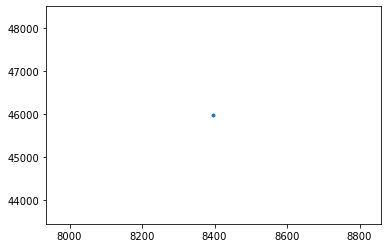

In [201]:
plt.plot(np.nanmean(dates),np.sum(np.isnan(mod.obs_scale)).values,linewidth=0,marker='.')

In [15]:
obsSST

<xarray.DataArray 'obs_value' (datum: 145901)>
array([18.00242139, 17.73904318, 17.81831871, ..., 23.28425419,
       23.56047121, 23.61259157])
Dimensions without coordinates: datum
Attributes:
    long_name:  observation value
    units:      state variable units

In [16]:
modInitialSST

<xarray.DataArray 'NLmodel_initial' (datum: 145901)>
array([18.43250419, 18.40719257, 18.51621903, ..., 23.5497079 ,
       23.53200111, 23.50192683])
Dimensions without coordinates: datum
Attributes:
    long_name:  initial nonlinear model at observation locations
    units:      state variable units

In [17]:
modFinalSST

<xarray.DataArray 'NLmodel_value' (Nouter: 1, datum: 145901)>
array([[18.38503993, 18.36588542, 18.48149319, ..., 23.64484188,
        23.63165966, 23.59471469]])
Dimensions without coordinates: Nouter, datum
Attributes:
    long_name:  nonlinear model at observation locations
    units:      state variable units

In [18]:
obsErrSST

<xarray.DataArray 'obs_error' (datum: 145901)>
array([0.25, 0.25, 0.25, ..., 0.25, 0.25, 0.25])
Dimensions without coordinates: datum
Attributes:
    long_name:  observation error covariance
    units:      squared state variable units

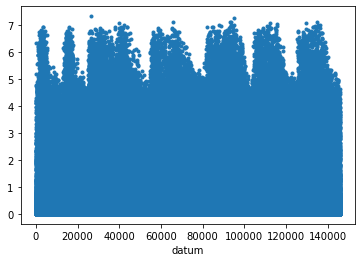

In [19]:
((obsSST - modInitialSST)**2/obsErrSST).plot(linewidth=0,marker='.')

In [20]:
((obsSST - modInitialSST)**2/obsErrSST)[20001]

<xarray.DataArray ()>
array(1.33313541)

In [21]:
obsSST[20001]

<xarray.DataArray 'obs_value' ()>
array(25.03487026)
Attributes:
    long_name:  observation value
    units:      state variable units

In [22]:
modInitialSST[20001]


<xarray.DataArray 'NLmodel_initial' ()>
array(24.45756284)
Attributes:
    long_name:  initial nonlinear model at observation locations
    units:      state variable units

In [23]:
modInitialSST


<xarray.DataArray 'NLmodel_initial' (datum: 145901)>
array([18.43250419, 18.40719257, 18.51621903, ..., 23.5497079 ,
       23.53200111, 23.50192683])
Dimensions without coordinates: datum
Attributes:
    long_name:  initial nonlinear model at observation locations
    units:      state variable units

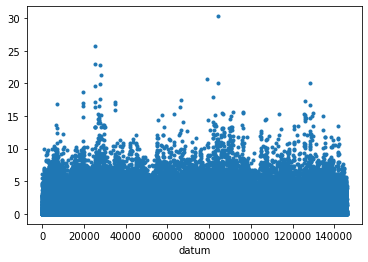

In [24]:
((obsSST - modFinalSST)**2/obsErrSST).plot(linewidth=0,marker='.')

In [48]:
JobsInitialSST

<xarray.DataArray 'JobsInitialSST' (time: 99)>
array([203128.16870381, 123814.2173244 , 171231.6908931 , 151825.26219067,
        99258.43009951, 148356.47524986, 247492.4522614 , 251112.40421539,
       181148.14037535, 181597.90582833, 237944.37343108, 224095.64724788,
       241481.14715844, 188124.81647859, 224996.79062195, 205439.5136671 ,
       126271.91383803, 182018.00702687, 156559.72361879,  98519.3649805 ,
       147739.95577602, 248409.69989372, 247638.69702217, 179910.60014471,
       178769.68540731, 230805.41818464, 218844.31592566, 237782.24895552,
       183716.09953094, 177318.51391278, 167217.23088058, 275977.34042887,
       261429.63223873, 296421.51060102, 179447.65354525, 185447.25846563,
       157920.03262802,  68082.38797809, 154422.27728769, 229571.28551114,
       246223.060104  , 286384.18934956, 281558.72638144, 273227.5743548 ,
       286072.28173768, 324408.13722103, 253649.80777903, 266740.67980637,
       150574.8081587 ,  81700.67113915, 134394.32354171, 211817.78338609,
       181935.13102792, 201535.98714531, 263797.18147599, 306006.48546632,
       317879.06548195, 295828.8218059 , 245941.07070212, 309545.05268189,
       168004.76895161, 258665.58580857, 218563.76354515, 194662.0966804 ,
       290481.11471289, 271752.66024819, 213583.98970924, 216626.72229218,
       278296.06093056, 281109.01268835, 136889.74996719, 205689.94294226,
       230369.28001634, 251621.0856269 , 206362.17009397, 217522.95143458,
       291791.92844001, 239415.32488584, 260299.82879477, 254240.01190471,
       207027.75455855, 250332.95350557, 210446.63970908, 231039.24537622,
       324466.99880619, 327290.91884839, 301886.4197583 , 163565.71555797,
       284867.17013644, 272591.51724581, 251491.63554392, 290461.87817877,
       196633.20025761, 234932.81215718, 285914.54311526, 208088.08498492,
       199517.11938657, 150604.10579953, 200918.06547853])
Coordinates:
  * time     (time) datetime64[ns] 2011-12-02 2011-12-06 ... 2012-12-28

In [50]:
ds2.NLcost_function

<xarray.DataArray 'NLcost_function' (Mouter: 2, cost_var: 12, time: 99)>
array([[[140185.44586602,  91303.62339687, 120224.04689137, ...,
         199367.58754604, 197649.83308559, 183090.93466578],
        [ 36539.25272376,  26446.46402532,  31823.72988687, ...,
          93854.31240596, 114846.44985398,  81112.38941545],
        [     0.        ,      0.        ,      0.        , ...,
              0.        ,      0.        ,      0.        ],
        ...,
        [     0.        ,      0.        ,      0.        , ...,
              0.        ,      0.        ,      0.        ],
        [     0.        ,      0.        ,      0.        , ...,
              0.        ,      0.        ,      0.        ],
        [     0.        ,      0.        ,      0.        , ...,
              0.        ,      0.        ,      0.        ]],

       [[ 99286.94210718,  72659.58008045,  93624.76146381, ...,
         134383.65853093, 131678.12321645, 135652.87272004],
        [ 17866.05168152,  15662.63598975,  18352.1045528 , ...,
          44041.9688195 ,  51672.81783476,  46765.52433869],
        [     0.        ,      0.        ,      0.        , ...,
              0.        ,      0.        ,      0.        ],
        ...,
        [     0.        ,      0.        ,      0.        , ...,
              0.        ,      0.        ,      0.        ],
        [     0.        ,      0.        ,      0.        , ...,
              0.        ,      0.        ,      0.        ],
        [     0.        ,      0.        ,      0.        , ...,
              0.        ,      0.        ,      0.        ]]])
Coordinates:
  * time      (time) datetime64[ns] 2011-12-02 2011-12-06 ... 2012-12-28
  * Mouter    (Mouter) int64 1 2
  * cost_var  (cost_var) int64 1 2 3 4 5 6 7 8 9 10 11 12

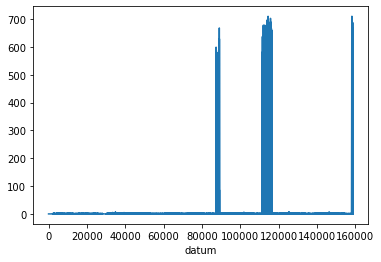

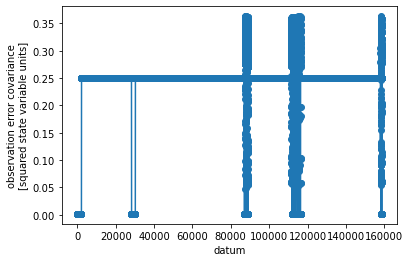

In [80]:
((obsALL - modFinalALL)**2).plot()
plt.show()
obsErrALL.plot(marker='o')

In [105]:
((obsALL - modFinalALL)**2).isel(datum=158201)

<xarray.DataArray (Nouter: 1)>
array([710.12306121])
Dimensions without coordinates: Nouter

In [107]:
obsALL.isel(datum=158201)

<xarray.DataArray 'obs_value' ()>
array(26.64813429)
Attributes:
    long_name:  observation value
    units:      state variable units

In [108]:
modFinalALL.isel(datum=158201)

<xarray.DataArray 'NLmodel_value' (Nouter: 1)>
array([0.])
Dimensions without coordinates: Nouter
Attributes:
    long_name:  nonlinear model at observation locations
    units:      state variable units

In [115]:
modInitialALL.isel(datum=158201)

<xarray.DataArray 'NLmodel_initial' ()>
array(0.)
Attributes:
    long_name:  initial nonlinear model at observation locations
    units:      state variable units

In [103]:
np.argmax(((obsALL - modFinalALL)**2).values)

158201

In [121]:
mod.NLmodel_initial!=0

<xarray.DataArray 'NLmodel_initial' (datum: 202889)>
array([ True,  True,  True, ...,  True, False,  True])
Dimensions without coordinates: datum

In [124]:
pRangeXBT

939

In [133]:
mod.NLmodel_value.where((obs.obs_provenance!=pRangeSST)|((obs.obs_provenance==pRangeSST)&(mod.NLmodel_initial!=0))|((obs.obs_provenance==pRangeXBT)&(mod.NLmodel_initial!=0)),drop=True)

<xarray.DataArray 'NLmodel_value' (Nouter: 1, datum: 158723)>
array([[ 0.25965064,  0.27351389,  0.28225923, ..., 10.88714632,
         0.        ,  6.87114319]])
Dimensions without coordinates: Nouter, datum
Attributes:
    long_name:  nonlinear model at observation locations
    units:      state variable units

In [140]:
mod.NLmodel_value.where(~np.isnan(mod.obs_scale), drop=True)

<xarray.DataArray 'NLmodel_value' (Nouter: 1, datum: 156904)>
array([[ 0.25965064,  0.27351389,  0.28225923, ..., 13.32177691,
        10.88714632,  6.87114319]])
Dimensions without coordinates: Nouter, datum
Attributes:
    long_name:  nonlinear model at observation locations
    units:      state variable units

In [137]:
np.isnan(mod.obs_scale)

<xarray.DataArray 'obs_scale' (datum: 202889)>
array([False, False, False, ..., False,  True, False])
Dimensions without coordinates: datum
Attributes:
    long_name:  observation screening/normalization scale

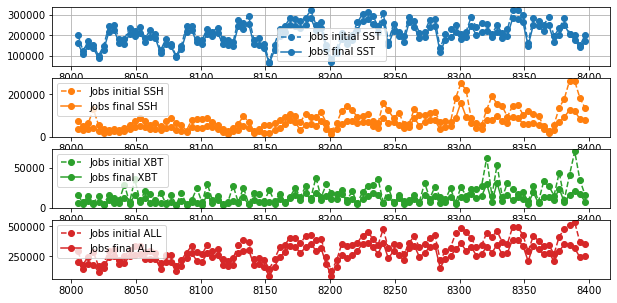

In [27]:
fig, ax = plt.subplots(4,figsize=(10,5))
ax[0].plot(timeVec,JobsInitialSST,linestyle='--',marker='o',color="C0",label='Jobs initial SST')
# ax.plot(timeVec,JobsInitialSSH, linestyle='--',marker='o',color="C1",label='Jobs initial SSH')
ax[0].plot(timeVec,JobsFinalSST, linestyle='-',marker='o',color="C0",label='Jobs final SST')
# ax.plot(timeVec,JobsFinalSSH, linestyle='-',marker='o',color="C1",label='Jobs final SSH')
# ax[1].plot(timeVec,JobsInitialSST,linestyle='--',marker='o',color="C0",label='Jobs initial SST')
ax[1].plot(timeVec,JobsInitialSSH, linestyle='--',marker='o',color="C1",label='Jobs initial SSH')
# ax[0].plot(timeVec,JobsFinalSST, linestyle='-',marker='o',color="C0",label='Jobs final SST')
ax[1].plot(timeVec,JobsFinalSSH, linestyle='-',marker='o',color="C1",label='Jobs final SSH')
ax[2].plot(timeVec,JobsInitialXBT, linestyle='--',marker='o',color="C2",label='Jobs initial XBT')
# ax[0].plot(timeVec,JobsFinalSST, linestyle='-',marker='o',color="C0",label='Jobs final SST')
ax[2].plot(timeVec,JobsFinalXBT, linestyle='-',marker='o',color="C2",label='Jobs final XBT')
ax[3].plot(timeVec,JobsInitialALL, linestyle='--',marker='o',color="C3",label='Jobs initial ALL')
# ax[0].plot(timeVec,JobsFinalSST, linestyle='-',marker='o',color="C0",label='Jobs final SST')
ax[3].plot(timeVec,JobsFinalALL, linestyle='-',marker='o',color="C3",label='Jobs final ALL')
ax[0].grid()
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()


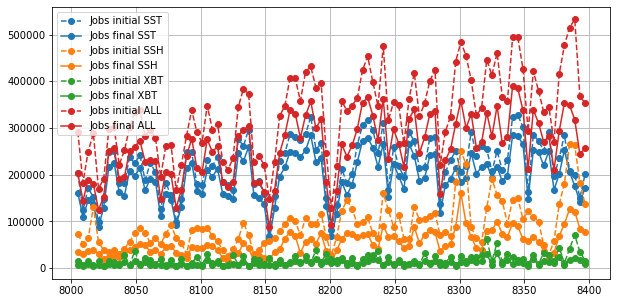

In [28]:
fig, ax = plt.subplots(1,figsize=(10,5))
ax.plot(timeVec,JobsInitialSST,linestyle='--',marker='o',color="C0",label='Jobs initial SST')
ax.plot(timeVec,JobsFinalSST, linestyle='-',marker='o',color="C0",label='Jobs final SST')
ax.plot(timeVec,JobsInitialSSH, linestyle='--',marker='o',color="C1",label='Jobs initial SSH')
ax.plot(timeVec,JobsFinalSSH, linestyle='-',marker='o',color="C1",label='Jobs final SSH')
ax.plot(timeVec,JobsInitialXBT, linestyle='--',marker='o',color="C2",label='Jobs initial XBT')
ax.plot(timeVec,JobsFinalXBT, linestyle='-',marker='o',color="C2",label='Jobs final XBT')
ax.plot(timeVec,JobsInitialALL, linestyle='--',marker='o',color="C3",label='Jobs initial ALL')
ax.plot(timeVec,JobsFinalALL, linestyle='-',marker='o',color="C3",label='Jobs final ALL')
ax.grid()
ax.legend()
ax.legend()
ax.legend()
ax.legend()


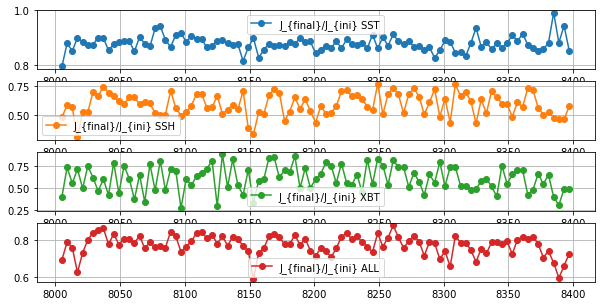

In [29]:
fig, ax = plt.subplots(4,figsize=(10,5))
ax[0].plot(timeVec,JobsFinalSST/JobsInitialSST, linestyle='-',marker='o',color="C0",label='J_{final}/J_{ini} SST')
ax[1].plot(timeVec,JobsFinalSSH/JobsInitialSSH, linestyle='-',marker='o',color="C1",label='J_{final}/J_{ini} SSH')
ax[2].plot(timeVec,JobsFinalXBT/JobsInitialXBT, linestyle='-',marker='o',color="C2",label='J_{final}/J_{ini} XBT')
ax[3].plot(timeVec,JobsFinalALL/JobsInitialALL, linestyle='-',marker='o',color="C3",label='J_{final}/J_{ini} ALL')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()


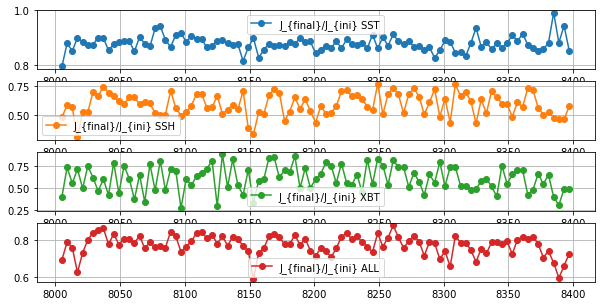

In [30]:
fig, ax = plt.subplots(4,figsize=(10,5))
ax[0].plot(timeVec,JobsFinalSST/JobsInitialSST, linestyle='-',marker='o',color="C0",label='J_{final}/J_{ini} SST')
ax[1].plot(timeVec,JobsFinalSSH/JobsInitialSSH, linestyle='-',marker='o',color="C1",label='J_{final}/J_{ini} SSH')
ax[2].plot(timeVec,JobsFinalXBT/JobsInitialXBT, linestyle='-',marker='o',color="C2",label='J_{final}/J_{ini} XBT')
ax[3].plot(timeVec,JobsFinalALL/JobsInitialALL, linestyle='-',marker='o',color="C3",label='J_{final}/J_{ini} ALL')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()


Text(0.5, 1.0, 'Ratio of $J_{final}/J_{ini}$ for each obs type')

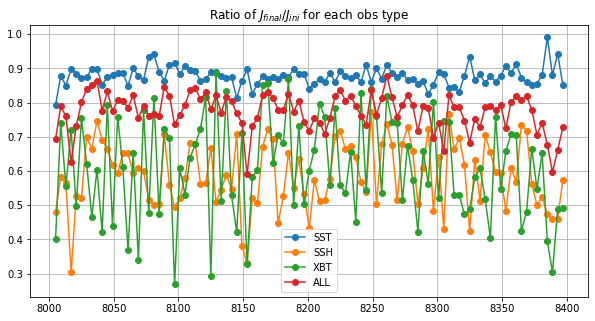

In [31]:
fig, ax = plt.subplots(1,figsize=(10,5)) 
ax.plot(timeVec,JobsFinalSST/JobsInitialSST, linestyle='-',marker='o',color="C0",label='SST')
ax.plot(timeVec,JobsFinalSSH/JobsInitialSSH, linestyle='-',marker='o',color="C1",label='SSH')
ax.plot(timeVec,JobsFinalXBT/JobsInitialXBT, linestyle='-',marker='o',color="C2",label='XBT')
ax.plot(timeVec,JobsFinalALL/JobsInitialALL, linestyle='-',marker='o',color="C3",label='ALL')
ax.grid()
ax.legend()
ax.legend()
ax.legend()
ax.legend()
ax.set_title('Ratio of $J_{final}/J_{ini}$ for each obs type')

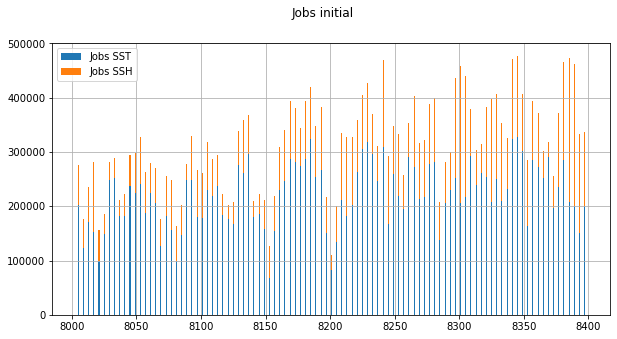

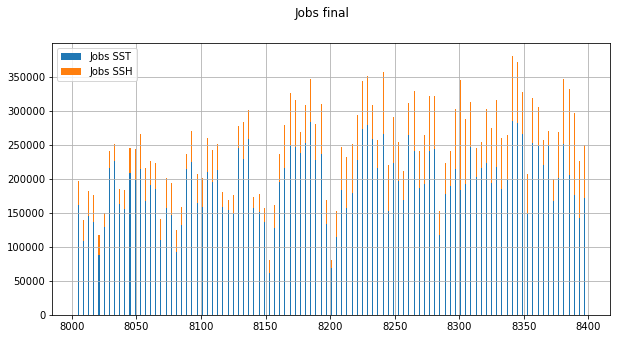

In [32]:
fig, ax = plt.subplots(1,figsize=(10,5))
ax.bar(timeVec,JobsInitialSST,color="C0",label='Jobs SST')
ax.bar(timeVec,JobsInitialSSH,bottom=JobsInitialSST,color="C1",label='Jobs SSH')
fig.suptitle('Jobs initial')
ax.grid()
ax.legend()

fig, ax = plt.subplots(1,figsize=(10,5))
ax.bar(timeVec,JobsFinalSST,color="C0",label='Jobs SST')
ax.bar(timeVec,JobsFinalSSH,bottom=JobsFinalSST,color="C1",label='Jobs SSH')
fig.suptitle('Jobs final')
ax.grid()
ax.legend()

Now do same but with ds outputs

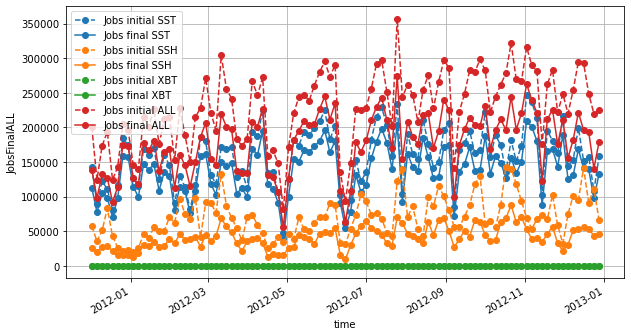

In [33]:
fig, ax = plt.subplots(1,figsize=(10,5))
ds1.JobsInitialSST.plot(ax=ax,linestyle='--',marker='o',color="C0",label='Jobs initial SST')
ds1.JobsFinalSST.plot(ax=ax,linestyle='-',marker='o',color="C0",label='Jobs final SST')
ds1.JobsInitialSSH.plot(ax=ax,linestyle='--',marker='o',color="C1",label='Jobs initial SSH')
ds1.JobsFinalSSH.plot(ax=ax,linestyle='-',marker='o',color="C1",label='Jobs final SSH')
ds1.JobsInitialXBT.plot(ax=ax,linestyle='--',marker='o',color="C2",label='Jobs initial XBT')
ds1.JobsFinalXBT.plot(ax=ax,linestyle='-',marker='o',color="C2",label='Jobs final XBT')
ds1.JobsInitialALL.plot(ax=ax,linestyle='--',marker='o',color="C3",label='Jobs initial ALL')
ds1.JobsFinalALL.plot(ax=ax,linestyle='-',marker='o',color="C3",label='Jobs final ALL')
ax.grid()
ax.legend()
ax.legend()
ax.legend()
ax.legend()


Text(0, 0.5, 'Ratio of Final/Initial observation cost function')

<Figure size 432x288 with 0 Axes>

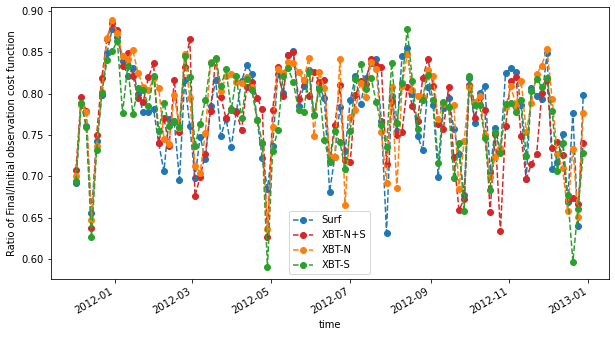

In [257]:

# gs to make a 4 row, 7 col plot
gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,5])
ax = None



ax = fig.add_subplot(gs[0,0])
(ds1.JobsFinalALL/ds1.JobsInitialALL).plot(ax=ax,linestyle='--',marker='o',color="C0",label='Surf')
(ds2.JobsFinalALL/ds2.JobsInitialALL).plot(ax=ax,linestyle='--',marker='o',color="C3",label='XBT-N+S')
(ds3.JobsFinalALL/ds3.JobsInitialALL).plot(ax=ax,linestyle='--',marker='o',color="C1",label='XBT-N')
(ds4.JobsFinalALL/ds4.JobsInitialALL).plot(ax=ax,linestyle='--',marker='o',color="C2",label='XBT-S')
ax.legend()
ax.set_ylabel('Ratio of Final/Initial observation cost function')

In [143]:
print(str(((ds1.JobsFinalALL/ds1.JobsInitialALL).mean(dim='time')).round(2).values)+' Surf')
print(str(((ds2.JobsFinalALL/ds2.JobsInitialALL).mean(dim='time')).round(2).values)+' XBT-N+S')
print(str(((ds3.JobsFinalALL/ds3.JobsInitialALL).mean(dim='time')).round(2).values)+' XBT-N')
print(str(((ds4.JobsFinalALL/ds4.JobsInitialALL).mean(dim='time')).round(2).values)+' XBT-S')

0.77 Surf
0.78 XBT-N+S
0.78 XBT-N
0.77 XBT-S


In [258]:
print(ds2.JobsInitialALL)
print(ds2.JobsInitialALL.mean(dim='time'))
print(ds2.JobsInitialALL.isel(time=-1))

<xarray.DataArray 'JobsInitialALL' (time: 99)>
array([280370.89173205, 182607.24679373, 240448.09378274, 284005.05231218,
       166816.34108782, 186642.28021506, 283160.03955735, 284956.99590856,
       213103.88621587, 223968.37005068, 295437.34434439, 288176.09162739,
       324444.19073914, 257582.87518743, 282133.62252086, 264421.75580306,
       220239.61818736, 285267.05358361, 273549.44927936, 175594.32517002,
       246682.35716839, 296409.57590231, 376173.48371171, 344208.79605651,
       389413.4126142 , 483799.17201357, 352079.61850599, 340725.42505027,
       269761.45132834, 222591.07431027, 241449.87188919, 391121.59681559,
       404174.40805791, 390985.21606549, 224176.01388635, 213791.84535449,
       205504.02156919, 137359.76959388, 194062.62406092, 290743.42499935,
       343078.38876095, 371145.62035857, 349541.28207713, 336423.17066875,
       353926.57033938, 422883.24240768, 336610.79717448, 366617.79366144,
       207389.29961667, 119758.41719854, 207407.22471

In [167]:
print(ds2.JobsFinalALL)
print(ds2.JobsFinalALL.mean(dim='time'))
print(ds2.JobsFinalALL.isel(time=-1))

<xarray.DataArray 'JobsFinalALL' (time: 99)>
array([198573.88421436, 145319.16016089, 187249.52292763, 180918.95487986,
       125132.30958199, 152964.5859026 , 245313.17199752, 252426.60690786,
       187009.14327   , 186832.7744087 , 250759.38503184, 236893.3675255 ,
       257832.73000071, 203540.05388744, 231292.26029565, 221363.95972216,
       163116.52667536, 219768.40942446, 201584.13714254, 143387.39124589,
       185779.19519009, 246751.29299221, 325708.05890964, 232700.42114955,
       272456.18756245, 351636.15467848, 274497.73177205, 286827.4180839 ,
       214630.2421058 , 171452.54984944, 188813.24422468, 304045.34387911,
       305715.70274969, 315758.27436995, 182654.81494168, 170037.93636581,
       160505.21434807,  86021.32367816, 151473.42653568, 242006.55987184,
       273582.13985454, 314156.13936618, 297407.24591559, 266985.26663973,
       288997.66086974, 337069.19777633, 278102.79733008, 298648.42575501,
       169468.58311014,  86100.87571074, 157981.750856 

In [261]:
print(ds2.NLcost_function.isel(Mouter=1,time=-1))
print(ds2.NLcost_function.isel(Mouter=0,time=-1))

<xarray.DataArray 'NLcost_function' (cost_var: 12)>
array([135652.87272004,  46765.52433869,      0.        ,      0.        ,
            0.        ,      0.        ,  88887.34838135,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ])
Coordinates:
    time      datetime64[ns] 2012-12-28
    Mouter    int64 2
  * cost_var  (cost_var) int64 1 2 3 4 5 6 7 8 9 10 11 12
<xarray.DataArray 'NLcost_function' (cost_var: 12)>
array([183090.93466578,  81112.38941545,      0.        ,      0.        ,
            0.        ,      0.        , 101978.54525033,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ])
Coordinates:
    time      datetime64[ns] 2012-12-28
    Mouter    int64 1
  * cost_var  (cost_var) int64 1 2 3 4 5 6 7 8 9 10 11 12


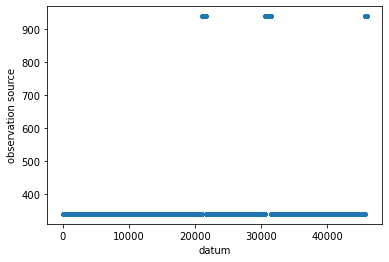

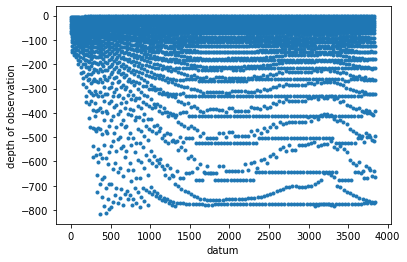

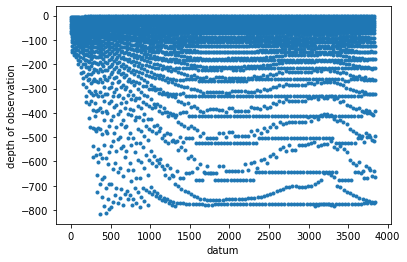

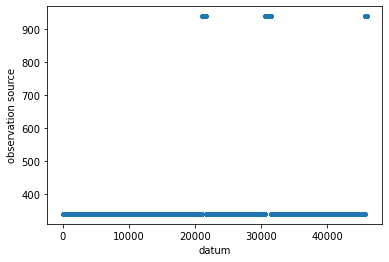

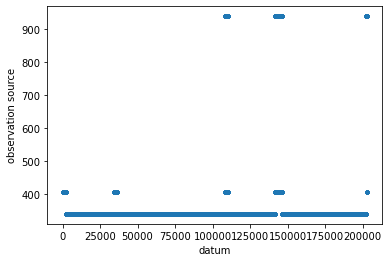

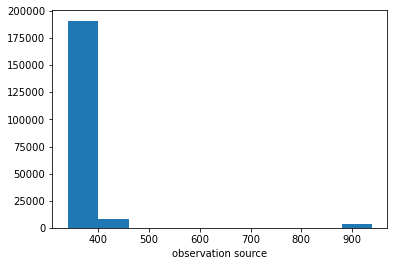

(array([44166.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1819.]),
 array([340. , 399.9, 459.8, 519.7, 579.6, 639.5, 699.4, 759.3, 819.2,
        879.1, 939. ]),
 <BarContainer object of 10 artists>)

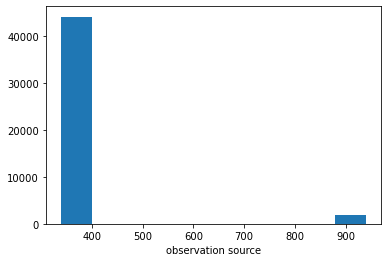

In [184]:
xbt = mod.obs_depth.where(mod.obs_provenance==939,drop=True)
mod.obs_provenance.where(np.isnan(mod.obs_scale),drop=True).plot(linewidth=0,marker='.')
plt.show()
xbt.plot(linewidth=0,marker='.')
plt.show()
mod.obs_depth.where(mod.obs_provenance==939,drop=True).plot(linewidth=0,marker='.')
plt.show()
mod.obs_provenance.where(np.isnan(mod.obs_scale),drop=True).plot(linewidth=0,marker='.')
plt.show()
mod.obs_provenance.plot(linewidth=0,marker='.')
plt.show()
mod.obs_provenance.plot.hist()
plt.show()
mod.obs_provenance.where(np.isnan(mod.obs_scale),drop=True).plot.hist()

(array([191127.,   7918.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   3844.]),
 array([340. , 399.9, 459.8, 519.7, 579.6, 639.5, 699.4, 759.3, 819.2,
        879.1, 939. ]),
 <BarContainer object of 10 artists>)

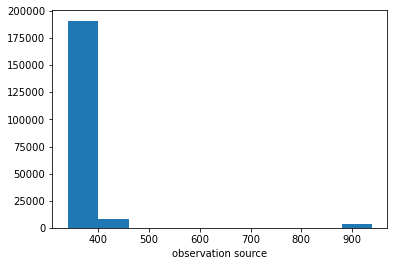

In [188]:
mod.obs_provenance.plot.hist()
# plt.show()
# mod.obs_provenance.where(np.isnan(mod.obs_scale),drop=True).plot.hist()
# plt.show()


<Figure size 432x288 with 0 Axes>

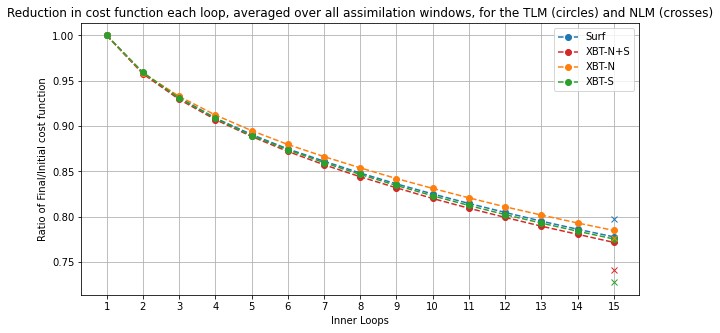

In [253]:

# gs to make a 4 row, 7 col plot
gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,5])
ax = None



ax = fig.add_subplot(gs[0,0])
(ds1.TLcost_function.mean(dim='time')/ds1.TLcost_function.mean(dim='time').isel(inner_loop=0)).plot(ax=ax,linestyle='--',marker='o',color="C0",label='Surf')
(ds2.TLcost_function.mean(dim='time')/ds2.TLcost_function.mean(dim='time').isel(inner_loop=0)).plot(ax=ax,linestyle='--',marker='o',color="C3",label='XBT-N+S')
(ds3.TLcost_function.mean(dim='time')/ds3.TLcost_function.mean(dim='time').isel(inner_loop=0)).plot(ax=ax,linestyle='--',marker='o',color="C1",label='XBT-N')
(ds4.TLcost_function.mean(dim='time')/ds4.TLcost_function.mean(dim='time').isel(inner_loop=0)).plot(ax=ax,linestyle='--',marker='o',color="C2",label='XBT-S')
ax.plot(15,(ds1.NLcost_function.isel(Mouter=1,time=-1,cost_var=0)/ds1.NLcost_function.isel(Mouter=0,time=-1,cost_var=0)),linestyle='--',marker='x',color="C0",label='')
ax.plot(15,(ds2.NLcost_function.isel(Mouter=1,time=-1,cost_var=0)/ds2.NLcost_function.isel(Mouter=0,time=-1,cost_var=0)),linestyle='--',marker='x',color="C3",label='')
ax.plot(15,(ds3.NLcost_function.isel(Mouter=1,time=-1,cost_var=0)/ds3.NLcost_function.isel(Mouter=0,time=-1,cost_var=0)),linestyle='--',marker='x',color="C1",label='')
ax.plot(15,(ds4.NLcost_function.isel(Mouter=1,time=-1,cost_var=0)/ds4.NLcost_function.isel(Mouter=0,time=-1,cost_var=0)),linestyle='--',marker='x',color="C2",label='')
ax.legend()
ax.set_xlabel('Inner Loops')
ax.set_ylabel('Ratio of Final/Initial cost function')
ax.set_title('Reduction in cost function each loop, averaged over all assimilation windows, for the TLM (circles) and NLM (crosses)')
ax.set_xticks(iteration)
ax.grid()

In [255]:
print(ds2.NLcost_function.isel(Mouter=1,time=-1,cost_var=0))
print(ds2.NLcost_function.isel(Mouter=0,time=-1,cost_var=0))

<xarray.DataArray 'NLcost_function' ()>
array(135652.87272004)
Coordinates:
    time      datetime64[ns] 2012-12-28
    Mouter    int64 2
    cost_var  int64 1
<xarray.DataArray 'NLcost_function' ()>
array(183090.93466578)
Coordinates:
    time      datetime64[ns] 2012-12-28
    Mouter    int64 1
    cost_var  int64 1


In [256]:
ds2.NLcost_function.isel(time=-1)

<xarray.DataArray 'NLcost_function' (Mouter: 2, cost_var: 12)>
array([[183090.93466578,  81112.38941545,      0.        ,
             0.        ,      0.        ,      0.        ,
        101978.54525033,      0.        ,      0.        ,
             0.        ,      0.        ,      0.        ],
       [135652.87272004,  46765.52433869,      0.        ,
             0.        ,      0.        ,      0.        ,
         88887.34838135,      0.        ,      0.        ,
             0.        ,      0.        ,      0.        ]])
Coordinates:
    time      datetime64[ns] 2012-12-28
  * Mouter    (Mouter) int64 1 2
  * cost_var  (cost_var) int64 1 2 3 4 5 6 7 8 9 10 11 12

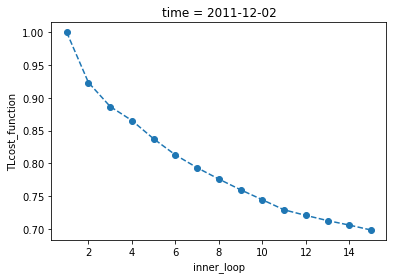

In [37]:
(ds1.TLcost_function.isel(time=0)/ds1.TLcost_function.isel(time=0).isel(inner_loop=0)).plot(linestyle='--',marker='o',color="C0",label='Surf')


In [38]:
mod

<xarray.Dataset>
Dimensions:          (survey: 141, state_var: 11, Ninner: 14, Nouter: 1, Minner: 15, three: 3, datum: 200975, Mouter: 2, cost_var: 12, iteration: 15)
Dimensions without coordinates: survey, state_var, Ninner, Nouter, Minner, three, datum, Mouter, cost_var, iteration
Data variables: (12/54)
    outer            int32 1
    inner            int32 14
    Nobs             (survey) int32 12 424 126 126 126 154 ... 32 20 20 20 20 52
    Nused_obs        (state_var) int32 7918 0 0 0 0 147831 0 0 0 0 0
    obs_mean         (state_var) float64 0.3848 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    obs_std          (state_var) float64 0.263 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ...               ...
    misfit_initial   (datum) float64 0.5768 2.527 2.644 ... 0.3585 1.931 3.497
    misfit_final     (datum) float64 0.5454 2.422 2.48 ... 1.003 2.333 3.846
    NLcost_function  (Mouter, cost_var) float64 1.765e+05 6.812e+04 ... 0.0 0.0
    TLcost_function  (iteration) float64 1.765e+05 1.675e+05 ... 1.274e+05
    back_function    (iteration) float64 0.0 2.338 7.881 ... 553.1 673.0 858.9
    Jmin             (iteration) float64 2.267 2.151 2.076 ... 1.701 1.678 1.648
Attributes: (12/15)
    type:              ROMS/TOMS 4D-Var output observation processing file
    Algorithm:         I4DVAR
    obs_file:          obs.nc
    state_variables:   \n1: free-surface (m) \n2: vertically integrated u-mom...
    svn_url:           https://github.com/powellb/uhroms.git/trunk
    svn_rev:           712
    ...                ...
    os:                Linux
    cpu:               x86_64
    compiler_system:   ifort
    compiler_command:  /apps/openmpi/4.1.0/bin/mpif90
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    history:           ROMS/TOMS, Version 3.9, Friday - November 26, 2021 -  ...

In [39]:
mod.NLcost_function.shape

(2, 12)